In [72]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans

In [73]:
data = pd.read_csv('Mall_Customers.csv')

In [74]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [75]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [76]:
data.shape

(200, 5)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [78]:
data.describe().round()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.0,200.0,200.0,200.0
mean,100.0,39.0,61.0,50.0
std,58.0,14.0,26.0,26.0
min,1.0,18.0,15.0,1.0
25%,51.0,29.0,42.0,35.0
50%,100.0,36.0,62.0,50.0
75%,150.0,49.0,78.0,73.0
max,200.0,70.0,137.0,99.0


In [79]:
x = data[['Annual Income (k$)','Spending Score (1-100)']]

In [80]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [81]:
# elbow methode 
wcss = []
k_values = range(1,11)

for k in k_values:
    kmeans = KMeans(n_clusters =k,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

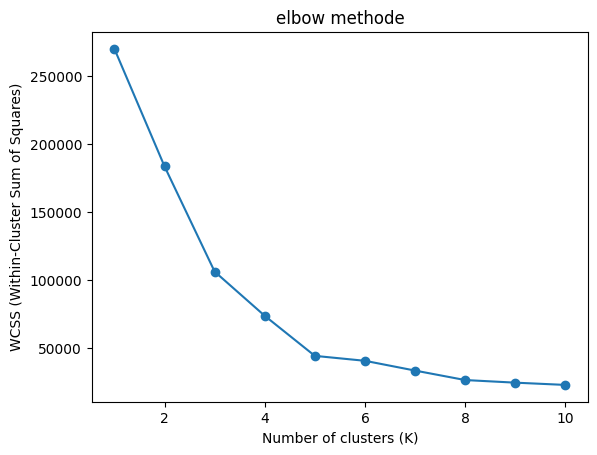

In [82]:
plt.plot(k_values,wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('elbow methode')
plt.show()

In [83]:
kmeansmodel=KMeans(n_clusters = 5,init = 'k-means++',random_state=0)


In [84]:
y_kmeans = kmeansmodel.fit_predict(x)

In [85]:
data['cluster']=y_kmeans
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [86]:
data['cluster'].value_counts()

cluster
0    81
1    39
2    35
3    23
4    22
Name: count, dtype: int64

In [87]:
kmeans.cluster_centers_

array([[ 56.46478873,  49.77464789],
       [ 97.09090909,  86.09090909],
       [ 79.        ,  16.59259259],
       [ 23.42857143,  84.78571429],
       [ 24.58333333,   9.58333333],
       [ 76.96      ,  80.8       ],
       [ 31.53333333,  35.86666667],
       [109.7       ,  22.        ],
       [ 33.5       ,  66.25      ],
       [127.66666667,  78.66666667]])

In [88]:
df1=data[data.cluster==0]
df2=data[data.cluster==1]
df3=data[data.cluster==2]
df4=data[data.cluster==3]
df5=data[data.cluster==4]


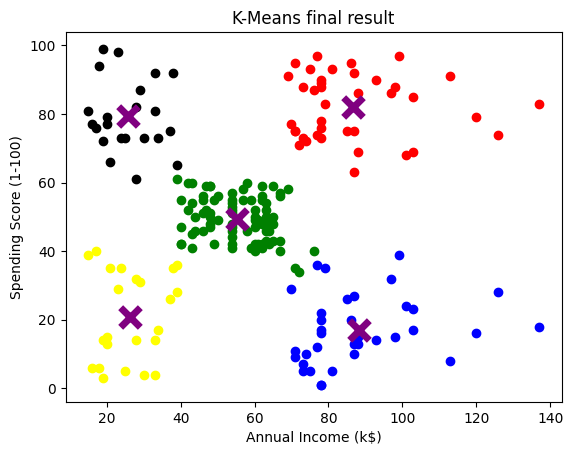

In [90]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='blue')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='yellow')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='black')
plt.scatter(kmeansmodel.cluster_centers_[:, 0],kmeansmodel.cluster_centers_[:, 1],marker='x', color='purple', s=200, linewidth=5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means final result')
plt.show()